# 4 Modeling<a id='4_Modeling'></a>

## 4.1 Contents<a id='4.1_Contents'></a>
* [4 Modeling](#4_modeling)
  * [4.1 Contents](#4.1_Contents)
  * [4.2 Introduction](#4.2_Introduction)
  * [4.3 Imports and Load Data](#4.3_Imports)
  * [4.4 Random Forests Classifier](#4.4_Random_Forests)
      * [4.4.1 Confusion Matrix](#4.4.1_confusion_matrix)
      * [4.4.2 Hyperparameter Tuning - Randomized Search](#4.4.2_randomized_search)  
      * [4.4.3 Hyperparameter Tuning - Grid Search](#4.4.3_grid_search)
  * [4.5 K-Means Clustering](#4.5_kmeans_clustering)
      * [4.5.1 Visualizing Clusters with PCA](#4.5.1_PCA)


## 4.2 Introduction<a id='4.2_Introduction'></a>

This notebook uses a Random Forests classifier to attempt to predict nonvoters from some of the survey responses. After that, a smaller subset of the data is used with K-Means clustering to attempt to cluster the voters into different types.

## 4.3 Imports and Load Data<a id='4.3_Imports'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

In [2]:
df = pd.read_csv('nonvoters_preprocessed.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Columns: 263 entries, Unnamed: 0 to voter_category_sporadic
dtypes: int64(263)
memory usage: 11.7 MB


In [4]:
df.head()

Unnamed: 0  Q2_1_1  Q2_1_2  Q2_1_3  Q2_1_4  Q2_2_1  Q2_2_2  Q2_2_3  Q2_2_4  \
0           0       1       0       0       0       1       0       0       0   
1           1       1       0       0       0       0       1       0       0   
2           2       1       0       0       0       1       0       0       0   
3           3       1       0       0       0       1       0       0       0   
4           4       1       0       0       0       1       0       0       0   

   Q2_3_1  ...  income_cat_$40-75k  income_cat_$75-125k  \
0       0  ...                   0                    1   
1       0  ...                   0                    0   
2       0  ...                   0                    0   
3       1  ...                   1                    0   
4       0  ...                   1                    0   

   income_cat_Less than $40k  age_26-35  age_36-45  age_46-55  age_56-65  \
0                          0          0          0          0          0   
1                          0          0          0          0          0   
2                          0          0          0          1          0   
3                          0          0          0          0          1   
4                          0          0          0          0          0   

   age_66+  voter_category_rarely/never  voter_category_sporadic  
0        1                            0                        0  
1        1                            0                        0  
2        0                            0                        1  
3        0                            0                        1  
4        1                            0                        0  

[5 rows x 263 columns]

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)
df.columns

Index(['Q2_1_1', 'Q2_1_2', 'Q2_1_3', 'Q2_1_4', 'Q2_2_1', 'Q2_2_2', 'Q2_2_3',
       'Q2_2_4', 'Q2_3_1', 'Q2_3_2',
       ...
       'income_cat_$40-75k', 'income_cat_$75-125k',
       'income_cat_Less than $40k', 'age_26-35', 'age_36-45', 'age_46-55',
       'age_56-65', 'age_66+', 'voter_category_rarely/never',
       'voter_category_sporadic'],
      dtype='object', length=262)

## 4.4 Random Forests Classifier<a id='4.4_Random_Forests'></a> 

In [6]:
# import Random Forests Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [7]:
# make X and y from df

X = df.drop(['voter_category_sporadic','voter_category_rarely/never'], axis=1)
y = df['voter_category_rarely/never']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
X_train.shape

(4668, 260)

In [8]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier


In [9]:
#clf = RandomForestClassifier(  random_state = None, n_jobs=-1)
clf = RandomForestClassifier(class_weight='balanced_subsample', random_state = 42, n_jobs=-1)

model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

print(cm)

Random Forest: Accuracy=0.806
Random Forest: f1-score=0.770
[[856  23]
 [204  85]]


Best result: Accuracy=0.805, f1-score=0.779 (default settings)

## 4.4.1 Confusion Matrix<a id='4.4.1_confusion_matrix'></a> 

Confusion matrix, without normalization
[[856  23]
 [204  85]]
Normalized confusion matrix
[[0.97 0.03]
 [0.71 0.29]]


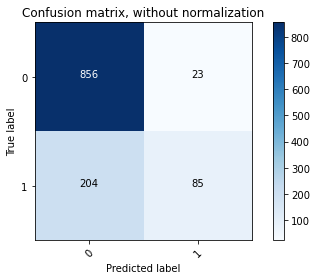

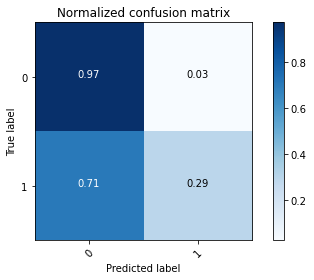

In [10]:
import itertools
from sklearn import svm, datasets
class_names = ['0','1']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

30


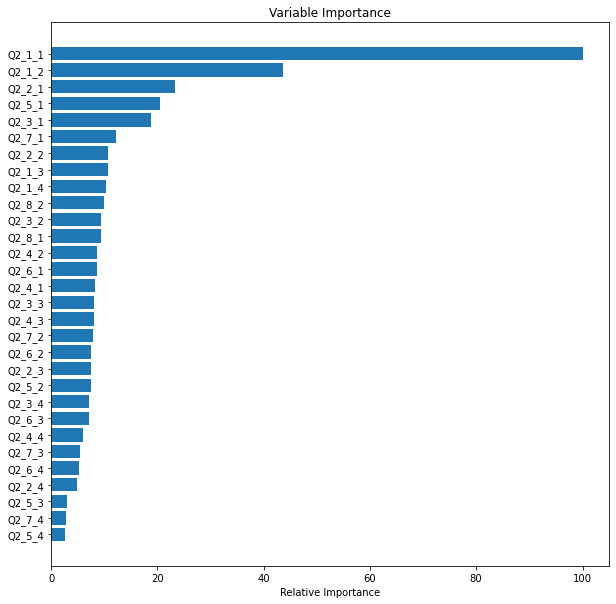

In [11]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [12]:
estimator = clf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = ['0','1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import run
run(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

## 4.4.2 Hyperparameter Tuning - Randomized Search<a id='4.4.2_randomized_search'></a> 

In [13]:
from sklearn.model_selection import RandomizedSearchCV

In [14]:
X_train.shape

(4668, 260)

In [68]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(20, 320, 11)]
# Number of features to consider at every split
max_features = ['sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Method of class balance
class_weight=['balanced','balanced_subsample',None]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight':class_weight}

In [69]:
# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)
rf_random.best_params_

{'n_estimators': 170,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'class_weight': None,
 'bootstrap': False}

 {'n_estimators': 203,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}
 
 {'n_estimators': 203,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}
 
 {'n_estimators': 260,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 60,
 'class_weight': 'balanced_subsample',
 'bootstrap': True}
 
 {'n_estimators': 170,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'class_weight': None,
 'bootstrap': False}

## 4.4.3 Hyperparameter Tuning - Grid Search<a id='4.4.3_grid_search'></a> 

In [13]:
from sklearn.model_selection import GridSearchCV


In [72]:
# Minimum number of samples required to split a node
min_samples_split = [2,5,7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 4, 7]
# Maximum number of levels in tree
max_depth = [50,80,None]
# Class weight
class_weight = ['balanced_subsample',None]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the grid
param_grid = { 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_depth': max_depth,
               'class_weight': class_weight,
               'bootstrap': bootstrap}

In [73]:
# add parameters to grid
rf = RandomForestClassifier(n_estimators=100)
rf_cv= GridSearchCV(rf,param_grid,cv=5)
rf_cv.fit(X_train,y_train)
print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Best Score:0.817477639995318
Best Parameters: {'bootstrap': False, 'class_weight': None, 'max_depth': 80, 'min_samples_leaf': 1, 'min_samples_split': 7}


Best Parameters:
    bootstrap=False, 
    max_depth=90,
    max_features='sqrt', 
    min_samples_leaf=1, 
    min_samples_split=5, 
    n_estimators=200
    

In [15]:
#clf = RandomForestClassifier(  random_state = None, n_jobs=-1)
clf = RandomForestClassifier(bootstrap=False, class_weight='balanced', 
    max_depth=90,
    max_features='sqrt', 
    min_samples_leaf=1, 
    min_samples_split=5, 
    n_estimators=200, random_state = 42, n_jobs=-1)

model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

print(cm)

Random Forest: Accuracy=0.812
Random Forest: f1-score=0.792
[[833  46]
 [173 116]]


The model is reasonably accurate but it not predicting never voters accurately--when it classifies as '1', it is wrong more often than it is right.

Try the model just on 'always' voters and 'never voters' -- drop the 'sporadic' voters.

In [15]:
# make X and y from df
df_always_never = df[df['voter_category_sporadic']==0]

X = df_always_never.drop(['voter_category_rarely/never'], axis=1)
y = df_always_never['voter_category_rarely/never']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
X_train.shape

(2609, 261)

In [83]:
# Minimum number of samples required to split a node
min_samples_split = [2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 4]
# Maximum number of levels in tree
max_depth = [90,None]
# Class weight
class_weight = ['balanced_subsample','balanced',None]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the grid
param_grid = { 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_depth': max_depth,
               'class_weight': class_weight,
               'bootstrap': bootstrap}
# add parameters to grid
rf = RandomForestClassifier(n_estimators=100)
rf_cv= GridSearchCV(rf,param_grid,cv=5)
rf_cv.fit(X_train,y_train)
print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Best Score:0.7895801619343878
Best Parameters: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [16]:
clf = RandomForestClassifier(bootstrap=True, class_weight='balanced', 
    max_depth=None,
    max_features='sqrt', 
    min_samples_leaf=1, 
    min_samples_split=5, 
    n_estimators=200, random_state = 42, n_jobs=-1)

model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

print(cm)

Random Forest: Accuracy=0.784
Random Forest: f1-score=0.781
[[320  51]
 [ 90 192]]


Removing 'sporadic' voters helped! The model is able to predict both 'always' and 'never' voters, though overall accuracy went down a bit.

30


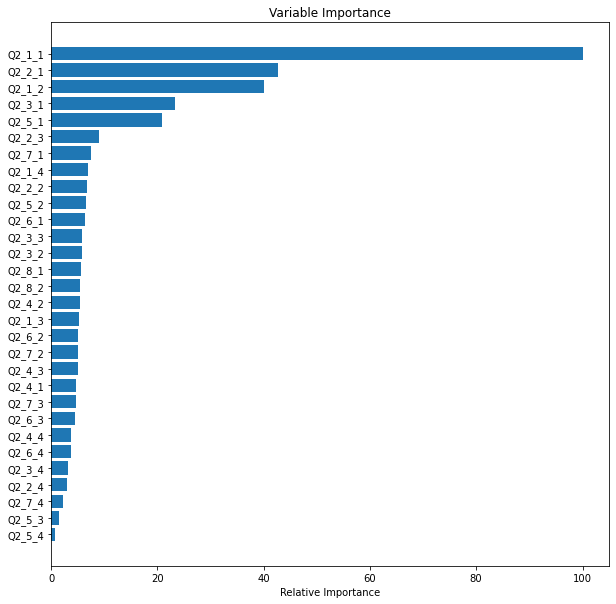

In [17]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Unsupervised Learning: K-Means clustering

## 4.5 K-Means Clustering<a id='4.5_kmeans_clustering'></a> 

In [19]:
from sklearn.cluster import KMeans
import numpy as np

In [37]:
X.columns

Index(['Q2_1_1', 'Q2_1_2', 'Q2_1_3', 'Q2_1_4', 'Q2_2_1', 'Q2_2_2', 'Q2_2_3',
       'Q2_2_4', 'Q2_3_1', 'Q2_3_2',
       ...
       'race_White', 'gender_Male', 'income_cat_$40-75k',
       'income_cat_$75-125k', 'income_cat_Less than $40k', 'age_26-35',
       'age_36-45', 'age_46-55', 'age_56-65', 'age_66+'],
      dtype='object', length=260)

In [85]:
X_top8 = X[['Q2_1_1','Q2_2_1','Q2_1_2','Q2_3_1','Q2_5_1','Q2_2_3','Q2_1_1','Q2_7_1']]
X_top5 = X[['Q2_1_1','Q2_2_1','Q2_1_2','Q2_3_1','Q2_5_1']]
X_best = X[['Q2_1_2', 'Q2_1_3', 'Q2_1_4', 'Q2_2_4', 'Q2_3_3', 'Q2_3_4', 'Q2_5_3', 'Q9_1_3', 'Q30_5']]
X_best2 = X[['Q2_1_3', 'Q2_1_4', 'Q2_3_4', 'Q2_5_3', 'Q9_1_3', 'Q30_5']]
# 'Q2_1_2': ('rarely/never', 2, 0.551490514905149, 407),
#  'Q2_1_3': ('rarely/never', 3, 0.7931034482758621, 115),
#  'Q2_1_4': ('rarely/never', 4, 0.83125, 133),
#  'Q2_2_4': ('rarely/never', 4, 0.5379061371841155, 149),
#  'Q2_3_3': ('rarely/never', 3, 0.5011135857461024, 225),
#  'Q2_3_4': ('rarely/never', 4, 0.675, 108),
#  'Q2_5_3': ('rarely/never', 3, 0.5459459459459459, 101),
#  'Q9_1_3': ('rarely/never', 3, 0.50625, 162),
#  'Q15_-1': ('rarely/never', -1, 0.53125, 102),
#  'Q30_5': ('rarely/never', 5, 0.5447761194029851, 365),
#  'Q33_-1.0': ('rarely/never', -1.0, 0.5197132616487455, 145),
#  'age_18-25'

In [58]:
x_cols = X_best.to_numpy()
x_cols

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [59]:
ss_means = []
k_list = []
for k in range(5,14): 
    ss = []
    k_list.append(k)
    for run in range(3):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit_predict(x_cols)
        ss.append(kmeans.inertia_)
    ss_means.append(np.mean(ss))
print(k_list,ss_means)

[5, 6, 7, 8, 9, 10, 11, 12, 13] [1263.8093600284915, 1139.3351620386948, 1017.702336213763, 930.4925871733961, 857.3763349629872, 801.3620984810376, 743.3513276373124, 692.6424733007901, 657.7863406740003]


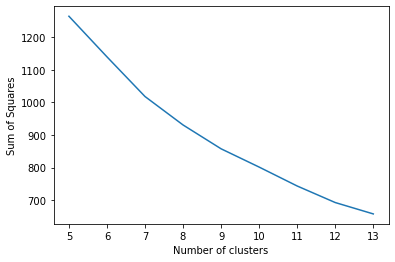

In [60]:
_ = plt.plot(k_list,ss_means)
_ = plt.xlabel('Number of clusters')
_ = plt.ylabel('Sum of Squares')
plt.show()

In [64]:
kmeans = KMeans(n_clusters=3)
kmeans.fit_predict(x_cols)

array([1, 1, 1, ..., 1, 0, 2])

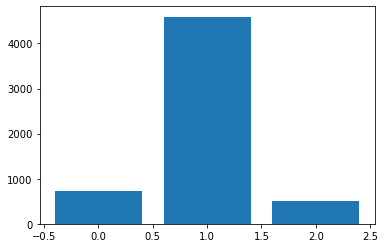

In [65]:
labels = kmeans.labels_
unique, counts = np.unique(labels, return_counts=True)
_ = plt.bar(unique, counts)
plt.show()

In [66]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
silhouette_score(x_cols, labels)

0.6989494703865116

## 4.5.1 Visualizing Clusters with PCA<a id='4.5.1_PCA'></a> 
Visualizing clusters with PCA

In [23]:
df.columns

Index(['Q2_1_1', 'Q2_1_2', 'Q2_1_3', 'Q2_1_4', 'Q2_2_1', 'Q2_2_2', 'Q2_2_3',
       'Q2_2_4', 'Q2_3_1', 'Q2_3_2',
       ...
       'income_cat_$40-75k', 'income_cat_$75-125k',
       'income_cat_Less than $40k', 'age_26-35', 'age_36-45', 'age_46-55',
       'age_56-65', 'age_66+', 'voter_category_rarely/never',
       'voter_category_sporadic'],
      dtype='object', length=262)

In [68]:
from sklearn.decomposition import PCA


PCA(n_components=2)

In [29]:
data = pd.read_csv('nonvoters2_wrangled.csv')

In [69]:
data.columns

Index(['Unnamed: 0', 'RespId', 'weight', 'Q2_1', 'Q2_2', 'Q2_3', 'Q2_4',
       'Q2_5', 'Q2_6', 'Q2_7',
       ...
       'Q30', 'Q31', 'Q32', 'Q33', 'ppage', 'educ', 'race', 'gender',
       'income_cat', 'voter_category'],
      dtype='object', length=119)

In [86]:
# choose number of components for PCA
n_components = 2
# choose number of cluster for K-Means clustering
n_clusters = 2
# choose dataframe subslice to convert to numpy array
x_cols = X_best2.to_numpy()

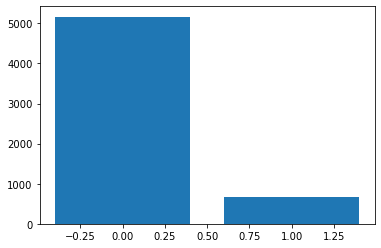

In [87]:
pca = PCA(n_components=n_components)
pca.fit(df)
pca_data = pca.transform(df)
pca_df = pd.DataFrame({'x':pca_data[:,0],'y':pca_data[:,1]
                       ,'kmeans label':labels,'voter category':data['voter_category']})
voter_code = {'rarely/never':2,'sporadic':1,'always':0}
for i in range(len(pca_df)):
    pca_df.loc[i,'voter code'] = voter_code[pca_df.loc[i,'voter category']]

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit_predict(x_cols)
labels = kmeans.labels_
unique, counts = np.unique(labels, return_counts=True)
_ = plt.bar(unique, counts)
plt.show()

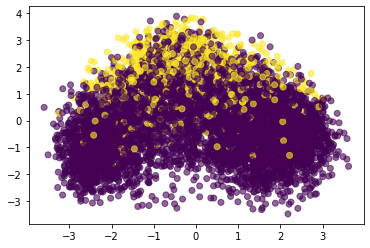

In [88]:
plt.scatter(pca_df['x'],pca_df['y'],c=pca_df['kmeans label'],alpha=.6)
plt.show()

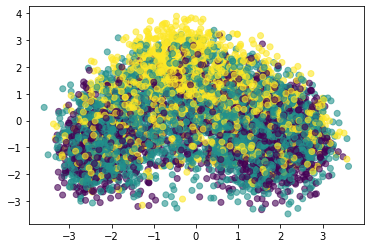

In [89]:
plt.scatter(pca_df['x'],pca_df['y'],c=pca_df['voter code'],alpha=.6)
plt.show()